In [1]:
#!/bin/env python


import sys,os,os.path,time
sys.path.append(os.path.expanduser('/global/u1/r/rgupta2/.local/lib/python3.7/site-packages/'))

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pims
!{sys.executable} -m pip install --user netCDF4
!{sys.executable} -m pip install --user xarray
!{sys.executable} -m pip install --user tqdm
!{sys.executable} -m pip install --user kornia

# export PYTHONPATH="${PYTHONPATH}:/usr/local/lib/python2.7/site-packages:/usr/lib/python2.7/site-packages"
import numpy as np
import time
import torch, kornia
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr

import tensorflow as tf
tf.enable_eager_execution()


# from mpl_toolkits.basemap import Basemap


file_path = "/project/projectdirs/dasrepo/mustafa/datasets/Rayleigh_Benard/result_rb_2d__Ra_2.5e8__Pr_0.71__maxMach_0.1__t_D_max_diffusive_scaling__0.4.nc"




  Using cached https://files.pythonhosted.org/packages/00/08/bbf9f5465c92ea6577bc5824fea21d2583e24e94fe10cc853587ffcacda0/PIMS-0.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/75/ae/fe46f5371105508a209fe6162e7e7b11db531a79d2eabcd24566b8b1f534/slicerator-1.0.0-py3-none-any.whl
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/common/software/tensorflow/intel-tensorflow/1.13.1-py36/lib/python3.6/site-packages/slicerator-1.0.0.dist-info'
Consider using the `--user` option or check the permissions.



In [2]:
t = time.time()

ds = xr.open_dataset(file_path, decode_times=False	)
print("Time takes : ", time.time()-t)

Time takes :  186.549866437912


In [13]:
	# randn = np.random.normal(loc=0, scale=1,size=(100,4,4,2))

generated_data = np.random.normal(loc=0, scale=1,size=(64, 256, 256,2))
generated_data = tf.convert_to_tensor( generated_data ,dtype=tf.float32)

ux_x = tf.image.sobel_edges(generated_data[:,:,:,:1])[:,:,:,:,1]
uy_y = tf.image.sobel_edges(generated_data[:,:,:,-1:])[:,:,:,:,0]
tmp =  (ux_x + uy_y)[:,:,:,0]
print("tmp shpae {}".format(tmp.shape))
values = tf.reduce_mean(tmp, axis=[1,2])

print("shape of ux_x {}, values {}".format(tf.shape(ux_x), tf.shape(values)))
print(values)

tmp shpae (64, 256, 256)
shape of ux_x [ 64 256 256   1], values [64]
tf.Tensor(
[-2.4536694e-03 -1.8531629e-03  1.7182006e-03 -3.3735428e-03
 -8.0793817e-04 -2.2731815e-03 -2.0319903e-03 -6.1782310e-05
  2.7541711e-03  6.2888261e-04  2.4369918e-04  2.1063169e-03
  1.3374723e-03 -1.5502485e-03 -1.6643974e-03 -6.5419194e-03
 -4.2761955e-03  1.1787447e-04 -4.4580791e-03  1.7794687e-04
 -2.7047680e-04  4.2728288e-03  1.3252029e-03  2.5481463e-04
 -5.6743431e-03 -2.7729797e-03  5.3334087e-03 -4.0549985e-03
 -1.5003227e-03 -5.3416942e-03  2.8009904e-03  2.6516318e-03
  5.0952623e-04 -2.6807357e-03 -2.0085629e-03 -1.5973713e-03
  9.9336426e-04 -4.2944318e-03 -9.4320218e-04  1.0699839e-03
  3.9364037e-04  2.0748121e-03 -2.0745478e-03 -7.0558069e-04
 -1.0158909e-03  1.5634957e-03  1.7250073e-04 -5.6663407e-03
 -1.9062725e-03 -4.3749297e-03 -1.4327718e-03 -2.4820515e-03
 -5.5516944e-03 -4.8451414e-03 -6.8623840e-04  1.8175314e-03
 -1.0502997e-03  1.5464046e-03 -1.2480821e-03  1.6693776e-03
 -2.

In [7]:


"""

To collect maximum normalized rbc data

"""


save_dir_path = "/global/cscratch1/sd/rgupta2/backup/StyleGAN/dataset/"

number_of_timesteps = 500
st_time = 10000
end_time = 15000
image_size = 256



tt = time.time()







for start_time in range(st_time, end_time, number_of_timesteps):


    ux_data = ds['u_x'][start_time : start_time+ number_of_timesteps].values
    uy_data = ds['u_y'][start_time : start_time+ number_of_timesteps].values



    print(ux_data.shape)


    ux_std = ux_data.std()
    uy_std = uy_data.std()

    u_data_max= max( ux_data.max(), uy_data.max())

    print("Ux_data_max = {} and Uy data max = {} and u_data_max {}".format(ux_data.max(), uy_data.max(), u_data_max))
    print("Ux std = {} and Uy std = {}".format(ux_std, uy_std))

    
    print("Time taken to read all", time.time() - tt)


    strides =  [x * ux_data.itemsize for x in [ux_data.shape[-1] * ux_data.shape[-2], image_size, ux_data.shape[-1], 1]]
    print("strides : {} ".format(strides))
    u_x = np.lib.stride_tricks.as_strided(ux_data, (number_of_timesteps, ux_data.shape[-1]//image_size, image_size, image_size), strides)




    strides =  [x * uy_data.itemsize for x in [uy_data.shape[-1] * uy_data.shape[-2], image_size, uy_data.shape[-1], 1]]
    print("strides : {} ".format(strides))
    u_y = np.lib.stride_tricks.as_strided(uy_data, (number_of_timesteps, ux_data.shape[-1]//image_size, image_size, image_size), strides)


    u_x = u_x.reshape( -1, image_size,image_size)
    u_y = u_y.reshape( -1, image_size,image_size)

    print("u-x shape {}  u_y shape  {} ".format(u_x.shape, u_y.shape))




    channels = np.array([u_x, u_y])
    print(channels.shape)
    Data = np.float32(channels)
    Data = Data.transpose(1,0,2,3)


    Data = np.true_divide(Data, 16969)
    print(Data.shape)


    save_path = os.path.join(save_dir_path , "rbc_{}/max/".format(number_of_timesteps))

    if not os.path.exists(save_path):
        os.makedirs(save_path)

    np.save( str(save_path) + "{}.npy".format(start_time), Data)




    
    
    
    
    
    

#     save_path = os.path.join(save_dir_path , "rbc_{}/max/".format(number_of_timesteps))

#     if not os.path.exists(save_path):
#         os.makedirs(save_path)


#     Data={'ux_data':ux_data, 'uy_data': uy_data}
#     np.save( str(save_path) + "original_data_{}.npy".format(start_time), Data)






(500, 256, 1792)
Ux_data_max = 13300.4814453125 and Uy data max = 16282.052734375 and u_data_max 16282.052734375
Ux std = 4417.00927734375 and Uy std = 4794.61279296875
Time taken to read all 11.446685075759888
strides : [1835008, 1024, 7168, 4] 
strides : [1835008, 1024, 7168, 4] 
u-x shape (3500, 256, 256)  u_y shape  (3500, 256, 256) 
(2, 3500, 256, 256)
(3500, 2, 256, 256)
(500, 256, 1792)
Ux_data_max = 13179.6015625 and Uy data max = 15245.142578125 and u_data_max 15245.142578125
Ux std = 4291.19189453125 and Uy std = 4668.5068359375
Time taken to read all 41.46374750137329
strides : [1835008, 1024, 7168, 4] 
strides : [1835008, 1024, 7168, 4] 
u-x shape (3500, 256, 256)  u_y shape  (3500, 256, 256) 
(2, 3500, 256, 256)
(3500, 2, 256, 256)
(500, 256, 1792)
Ux_data_max = 13250.5595703125 and Uy data max = 15097.3173828125 and u_data_max 15097.3173828125
Ux std = 4297.0654296875 and Uy std = 4643.060546875
Time taken to read all 72.73232054710388
strides : [1835008, 1024, 7168, 4] 


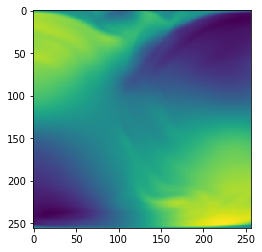

In [12]:
ds_loaded = np.load("/global/cscratch1/sd/rgupta2/backup/StyleGAN/dataset/rbc_500/max/10500.npy")
u_x_loaded = ds_loaded[421,0,:,:]
plt.imshow(u_x_loaded)



(256, 1792)


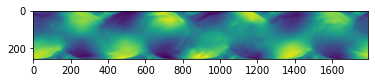

In [16]:
ds_original = ds['u_x'][10560].values
print(ds_original.shape)
plt.imshow(ds_original)

In [18]:
print(u_x_loaded) 
print(ds_original[:,:256])

[[ 0.08237864  0.07977899  0.07714199 ... -0.11645104 -0.11899242
  -0.12144014]
 [ 0.22805429  0.22293687  0.21766508 ... -0.31407714 -0.318203
  -0.32211018]
 [ 0.33761904  0.33272523  0.3275959  ... -0.44243997 -0.44540107
  -0.4481141 ]
 ...
 [-0.2709726  -0.28486183 -0.29780802 ...  0.06033449  0.050705
   0.04162923]
 [-0.14076333 -0.15207896 -0.16327831 ...  0.01050911  0.00588168
   0.00163316]
 [-0.03564639 -0.03958966 -0.043652   ... -0.00579991 -0.00680068
  -0.00767201]]
[[  210.76573   215.55272   218.13963 ...  1526.1434   1484.0939
   1441.333  ]
 [  334.4324    326.4984    312.4139  ...  4114.834    4035.7444
   3954.0896 ]
 [  179.56209   131.02603    72.54835 ...  5955.0034   5883.4883
   5808.1914 ]
 ...
 [ 7346.237    7416.8164   7481.842   ... -3821.0786  -4089.04
  -4348.9775 ]
 [ 5958.997    5984.382    6003.7573  ... -1820.5756  -2006.6365
  -2196.6228 ]
 [ 2569.8105   2568.5469   2564.147   ...  -422.1116   -479.5375
   -540.61346]]


In [5]:




with 
with print d2.item().get('key2')








    
    
#   tmp_plot = u_y.reshape(-1,image_size, image_size)
   

#   fig.add_subplot(2, 2, idx)
#   idx += 1
#   plt.imshow(u_y[0,0])
#   plt.xticks([])
#   plt.yticks([])
    
    
#   fig.add_subplot(2, 2,  idx)
#   idx += 1
#   plt.imshow(tmp_plot[0])
#   plt.xticks([])
#   plt.yticks([])
    
#   fig.add_subplot(2, 2, idx)
#   idx += 1
#   plt.imshow(u_y[0,1])
#   plt.xticks([])
#   plt.yticks([])
    
    
#   fig.add_subplot(2, 2,  idx)
#   idx += 1
#   plt.imshow(tmp_plot[1])
#   plt.xticks([])
#   plt.yticks([])


        
    
    print("Time taken to complete iteration", time.time() - tt)
    
#   plt.savefig(os.path.join(save_dir_path , "uy_sliced_correctly_check.png"), dpi=400)
    
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 72)

In [5]:
st_time = 10000
end_time = 15000
image_size = 256

tt = time.time()



ux_data = ds['u_x'][st_time : end_time].values
uy_data = ds['u_y'][st_time : end_time].values

ux_reshape = ux_data.reshape( -1, image_size,image_size)
uy_reshape = uy_data.reshape( -1, image_size,image_size)




(2, 35000, 256, 256)
(512, 256, 256)


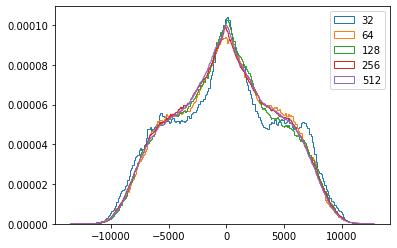

In [19]:

channels = np.array([ux_reshape, uy_reshape])
print(channels.shape)



Data = ux_reshape
Data = Data[np.random.choice(Data.shape[0], size=512, replace=False), :, :]

print(Data.shape)
# Data = Data.transpose(1,0,2,3)

ax = plt.figure()

counter = 16

while counter <= 256:
    counter *= 2
    total_preds = Data[np.random.choice(Data.shape[0], size=counter, replace=False), :, :]
    plt.hist(total_preds.flatten(), bins='fd',histtype='step', label="{}".format(counter), density=True)

    
plt.legend()    

plt.savefig("plot_for_ux_across_different_minibatch.png", dpi=400)
plt.show()

(512, 256, 256)


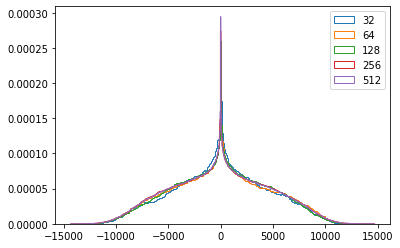

In [21]:
Data = uy_reshape
Data = Data[np.random.choice(Data.shape[0], size=512, replace=False), :, :]

print(Data.shape)
# Data = Data.transpose(1,0,2,3)

ax = plt.figure()

counter = 16

while counter <= 256:
    counter *= 2
    total_preds = Data[np.random.choice(Data.shape[0], size=counter, replace=False), :, :]
    plt.hist(total_preds.flatten(), bins='fd',histtype='step', label="{}".format(counter), density=True)

    
plt.legend()    

plt.savefig("plot_for_uy_across_different_minibatch.png", dpi=400)
plt.show()

In [17]:
"""  
Plotting divergence plot for 1000 randomly sampled time steps

"""
import kornia
import torch


channels = np.array([ux_reshape, uy_reshape])

print(channels.shape)

Data = np.float32(channels)
Data = Data.transpose(1,0,2,3)

print("Data shape : {}".format(Data.shape))

counter = 64
total_preds = Data[np.random.choice(Data.shape[0], size=counter, replace=False), :, :]

def divergence(preds):
    #preds: batch_size*output_steps*2*H*W
    device = 'cpu'
    preds = torch.from_numpy(preds).float().to(device)
    print("preds shape: {}".format(preds.shape))
    output = kornia.filters.SpatialGradient()(preds)

#     preds_u = preds[:,0,:,:]
#     preds_v = preds[:,1,:,:]
#     u = torch.from_numpy(preds_u).float().to(device)
#     v = torch.from_numpy(preds_v).float().to(device)
#     #Sobolev gradients
#     field_grad = kornia.filters.SpatialGradient()
#     u_x = field_grad(u)[:,0, :, :]
#     v_y = field_grad(v)[:,1, :, :]
#     div = torch.mean(torch.abs(v_y + u_x), dim = (0,2,3)).cpu().data.numpy()
    return output




### from karhitk and ruii's code (sic)
# def divergence(preds):
#     #preds: batch_size*output_steps*2*H*W
#     preds_u = preds[:,:,0]
#     preds_v = preds[:,:,1]
#     u = torch.from_numpy(preds_u).float().to(device)
#     v = torch.from_numpy(preds_v).float().to(device)
#     #Sobolev gradients
#     field_grad = kornia.filters.SpatialGradient()
#     u_x = field_grad(u)[:,:,0]
#     v_y = field_grad(v)[:,:,1]
#     div = torch.mean(torch.abs(v_y + u_x), dim = (0,2,3)).cpu().data.numpy()
#     return div

##################################################################################

    
def divergence_tf(total_preds):
    # shape = NCHW
    print("divergence_tf total_preds shape :  ",total_preds.shape)
    
    
    total_preds.transpose(0,2,3,1)
    # shape = NHWC
    
    total_preds = tf.convert_to_tensor(total_preds, dtype=tf.float32)
    out = tf.image.sobel_edges(total_preds)
    dy, dx = tf.image.image_gradients(total_preds)
    
    print(" divergence_tf total_preds.shape : ",out.shape)
    return out, dy, dx 


#     print(div.shape)
#     div = torch.mean(torch.abs(div), dim = (1,2,3)).cpu().data.numpy()
#     print(div.shape)
#     fig=plt.figure(figsize=(6.4, 4.8))	
    
#     plt.hist(div, bins = 'fd')
    
#     plt.show()
    
    

out1 = divergence(total_preds)

out2, dy, dx = divergence_tf(total_preds)



# out1 = out1.permute(0,1,3,4,2)
print(" out shape from pytorch {}    out shape from tensorflow {}".format(out1.shape, out2.shape))

print(np.allclose(out1.numpy() , out2.numpy().transpose(0,1,4,2,3), rtol=10 ))    



#     total_preds = total_preds.transpose(0,2,3,1)
#     print(total_preds.shape)
#     for preds in total_preds:
#         #preds: batch_size*output_steps*2*H*W
#         preds_u = preds[:,:,0]
#         preds_v = preds[:,:,1]
#         u = torch.from_numpy(preds_u).float()
#         v = torch.from_numpy(preds_v).float()
#         #Sobolev gradients

#         v_y = field_grad(v)[:,:,1]
        

    
    








(2, 35000, 256, 256)
Data shape : (35000, 2, 256, 256)
preds shape: torch.Size([64, 2, 256, 256])
divergence_tf total_preds shape :   (64, 2, 256, 256)
 divergence_tf total_preds.shape :  (64, 2, 256, 256, 2)
 out shape from pytorch torch.Size([64, 2, 2, 256, 256])    out shape from tensorflow (64, 2, 256, 256, 2)
False


In [3]:
import numpy as np
np.random.seed(100)
randn = np.random.normal(loc=0, scale=1,size=(100,4,4,2))
rand = tf.convert_to_tensor(randn,dtype=tf.float16)
ux_x = tf.image.sobel_edges(rand[:,:,:,:1])[:,:,:,:,1]
uy_y = tf.image.sobel_edges(rand[:,:,:,-1:])[:,:,:,:,0]
(ux_x + uy_y)[20,:,:,0]


<tf.Tensor: id=128, shape=(4, 4), dtype=float16, numpy=
array([[ 0.000e+00, -3.717e+00,  1.337e+00, -1.953e-03],
       [ 6.234e+00,  1.695e+00,  1.775e+00, -1.502e+00],
       [ 7.432e-01,  3.887e-01,  6.578e+00,  6.590e+00],
       [ 0.000e+00, -7.324e-01,  2.959e+00,  4.272e-04]], dtype=float16)>

Ux_data_max = 13300.4814453125 and Uy data max = 16282.052734375
Ux std = 4417.00927734375 and Uy std = 4794.61279296875
Ux mean = -3.9257781505584717 and Uy mean = 0.07705217599868774
Time taken to read all :  17.11458969116211


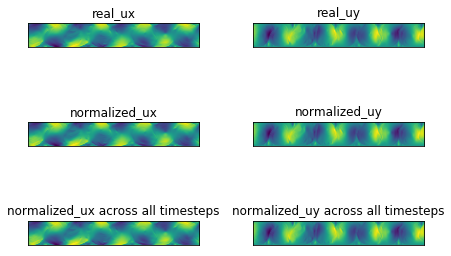

In [24]:
"""
This block plots the differnet velocity field vectors for considered time range and how normalizing them affects them

"""


# ux_data_for_tke = ds['u_x'][st_time : end_time].values
# uy_data_for_tke = ds['u_y'][st_time : end_time].values


# dataset_location = "/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/"


    

# dir_path = "/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_with_std_dev/"

number_of_timesteps = 500
st_time = 10000
end_time = 10500
image_size = 256

tt = time.time()
idx = 1
for start_time in range(st_time, end_time, number_of_timesteps):
    ux_data = ds['u_x'][start_time : start_time+ number_of_timesteps].values
    uy_data = ds['u_y'][start_time : start_time+ number_of_timesteps].values
    
    ux_std = ux_data.std()
    uy_std = uy_data.std()
    
    u_data_max= max( ux_data.max(), uy_data.max())
    
    
    ux_mean = ux_data.mean()
    uy_mean = uy_data.mean()
    
    
    u_x_entire = (ux_data - ux_mean)/ux_std
    u_y_entire = (uy_data - uy_mean)/uy_std
    
    print("Ux_data_max = {} and Uy data max = {}".format(ux_data.max(), uy_data.max()))
    print("Ux std = {} and Uy std = {}".format(ux_std, uy_std))
    print("Ux mean = {} and Uy mean = {}".format(ux_mean, uy_mean))


    print("Time taken to read all : ", time.time() - tt)
#     u_x = (ux_data - ux_mean)/ux_std
#     u_y = (uy_data - uy_mean)/uy_std
          

#     tmp_diff = tmp_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
#     press_diff = press_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
    
           
    
#     u_x = u_x.reshape(number_of_timesteps, -1, image_size,image_size)
#     u_y = u_y.reshape(number_of_timesteps, -1, image_size,image_size)
    
    
    fig=plt.figure(figsize=(6.4, 4.8))	
    
    
    
    tim = start_time +  number_of_timesteps//2
    
    ux_data_plot = ds['u_x'][tim].values
    uy_data_plot = ds['u_y'][tim].values
    
    

    
    
    ux_normalized = (ux_data_plot - ux_mean)/ux_std
    uy_normalized = (uy_data_plot - uy_mean)/uy_std
    
    
    fig.add_subplot(3, 2, idx).set_title("real_ux")
    idx += 1
    plt.imshow(ux_data_plot)
    plt.xticks([])
    plt.yticks([])
    
    
    
    fig.add_subplot(3, 2,  idx).set_title("real_uy")
    idx += 1
    plt.imshow(uy_data_plot)
    plt.xticks([])
    plt.yticks([])
    
    
    
    
    fig.add_subplot(3, 2,  idx).set_title("normalized_ux")
    idx += 1
    plt.imshow(ux_normalized)
    plt.xticks([])
    plt.yticks([])
    
    
    
    fig.add_subplot(3, 2,  idx).set_title("normalized_uy")
    idx += 1
    plt.imshow(uy_normalized)
    plt.xticks([])
    plt.yticks([])
    
    
    
    fig.add_subplot(3, 2,  idx).set_title("normalized_ux across all timesteps")
    idx += 1
    plt.imshow(u_x_entire[number_of_timesteps//2, : , :])
    plt.xticks([])
    plt.yticks([])
    
    
    fig.add_subplot(3, 2,  idx).set_title("normalized_uy across all timesteps")
    idx += 1
    plt.imshow(u_y_entire[number_of_timesteps//2, : , :])
    plt.xticks([])
    plt.yticks([])
    
    
    
    
    

plt.subplots_adjust(hspace=0.1, wspace=0.1)
fig.tight_layout()
plt.savefig("./original_and_normalized.jpg", dpi = 200)

    
          
# print(ux_data_for_tke.shape)
# print(uy_data_for_tke.shape)

# res_list = [8, 16, 32, 64, 128, 256]
# tt = time.time()
# Data = {}
# for res in res_list:
#     ux_reshape = ux_data_for_tke.reshape(-1, res, res)    
#     uy_reshape = uy_data_for_tke.reshape(-1, res, res)
    
#     print(ux_reshape.shape)
#     ux_data_mean_tke = np.mean(ux_reshape, axis = 0)
#     uy_data_mean_tke = np.mean(uy_reshape, axis = 0)
#     print(ux_data_mean_tke.shape)
#     print("Time taken to complete iteration", time.time() - tt)
#     Data["{}_ux".format(res)] = ux_data_mean_tke
#     Data["{}_uy".format(res)] = uy_data_mean_tke
    

(2000, 256, 1792)
Ux_data_max = 13847.693359375 and Uy data max = 16282.052734375
Ux std = 4322.13818359375 and Uy std = 4682.7080078125
Time taken to read all 41.32292652130127
strides : [1835008, 1024, 7168, 4] 
strides : [1835008, 1024, 7168, 4] 
u-x shape (2000, 7, 256, 256)  u_y shape  (2000, 7, 256, 256) 
Time taken to complete iteration 41.718777656555176


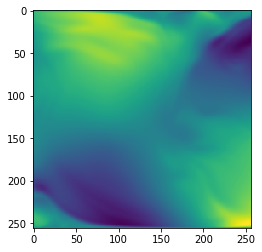

In [29]:
#  ds.groupby('time.month').std('time')
    
    
import os
import time

dir_path = "/global/cscratch1/sd/rgupta2/backup/StyleGAN/dataset/rbc_2000/"

number_of_timesteps = 2000
st_time = 10000
end_time = 12000
image_size = 256

tt = time.time()


fig=plt.figure(figsize=(40, 2))




idx=1

for start_time in range(st_time, end_time, number_of_timesteps):
    ux_data = ds['u_x'][start_time : start_time+ number_of_timesteps].values
    uy_data = ds['u_y'][start_time : start_time+ number_of_timesteps].values
    
    
    print(ux_data.shape)
    
    
    ux_std = ux_data.std()
    uy_std = uy_data.std()
    
    u_data_max= max( ux_data.max(), uy_data.max())
    
    print("Ux_data_max = {} and Uy data max = {}".format(ux_data.max(), uy_data.max()))
    print("Ux std = {} and Uy std = {}".format(ux_std, uy_std))
    
    
#     tmp_diff_data = ds['temp_diff'][start_time : start_time+ number_of_timesteps].values
#     press_diff_data = ds['press_diff'][start_time : start_time+ number_of_timesteps].values

    print("Time taken to read all", time.time() - tt)
    rb_data = []
    
    
    strides =  [x * ux_data.itemsize for x in [ux_data.shape[-1] * ux_data.shape[-2], image_size, ux_data.shape[-1], 1]]
    print("strides : {} ".format(strides))
    u_x = np.lib.stride_tricks.as_strided(ux_data, (number_of_timesteps, 7, image_size, image_size), strides)
    

    
    
    strides =  [x * uy_data.itemsize for x in [uy_data.shape[-1] * uy_data.shape[-2], image_size, uy_data.shape[-1], 1]]
    print("strides : {} ".format(strides))
    u_y = np.lib.stride_tricks.as_strided(uy_data, (number_of_timesteps, 7, image_size, image_size), strides)
    
    
    
    print("u-x shape {}  u_y shape  {} ".format(u_x.shape, u_y.shape))
    
    tmp_plot = u_y.reshape(-1,image_size, image_size)
   

    fig.add_subplot(2, 2, idx)
    idx += 1
    plt.imshow(u_y[0,0])
    plt.xticks([])
    plt.yticks([])
    
    
    fig.add_subplot(2, 2,  idx)
    idx += 1
    plt.imshow(tmp_plot[0])
    plt.xticks([])
    plt.yticks([])
    
    fig.add_subplot(2, 2, idx)
    idx += 1
    plt.imshow(u_y[0,1])
    plt.xticks([])
    plt.yticks([])
    
    
    fig.add_subplot(2, 2,  idx)
    idx += 1
    plt.imshow(tmp_plot[1])
    plt.xticks([])
    plt.yticks([])
    
    
#     u_x = ux_data.reshape( -1, image_size,image_size)/ux_std
#     u_y = uy_data.reshape( -1, image_size,image_size)/uy_std
#     tmp_diff = tmp_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
#     press_diff = press_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
    
    
#     channels = np.array([u_x, u_y])
#     print(channels.shape)
#     Data = np.float32(channels)
#     Data = Data.transpose(1,0,2,3)
# #     Data = Data.reshape( -1,2,image_size, image_size)
#     print(Data.shape)
    
    
#     save_path = os.path.join(dir_path , "rbc_{}/".format(number_of_timesteps))

#     if not os.path.exists(save_path):
#         os.makedirs(save_path)

#     np.save( str(save_path) + "{}.npy".format(start_time), Data)
    
    
    print("Time taken to complete iteration", time.time() - tt)
    
    plt.savefig("./sample of velocities.png".format(), dpi=400)

In [ ]:
#!/bin/env python

import sys,os,os.path
sys.path.append(os.path.expanduser('/global/u1/r/rgupta2/.local/lib/python3.7/site-packages/'))

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pims
!{sys.executable} -m pip install --user netCDF4
!{sys.executable} -m pip install --user xarray


# export PYTHONPATH="${PYTHONPATH}:/usr/local/lib/python2.7/site-packages:/usr/lib/python2.7/site-packages"
import numpy as np
import time
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr


In [16]:
import os
import time

dir_path = "/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_max/"

number_of_timesteps = 500
st_time = 10000
end_time = 23000
image_size = 256

tt = time.time()

for start_time in range(st_time, end_time, number_of_timesteps):
    ux_data = ds['u_x'][start_time : start_time+ number_of_timesteps].values
    uy_data = ds['u_y'][start_time : start_time+ number_of_timesteps].values
    
    ux_std = ux_data.std()
    uy_std = uy_data.std()
    
    u_data_max= max( ux_data.max(), uy_data.max())
    
    print("Ux_data_max = {} and Uy data max = {}".format(ux_data.max(), uy_data.max()))
    print("Ux std = {} and Uy std = {}".format(ux_std, uy_std)
    


SyntaxError: unexpected EOF while parsing (<ipython-input-16-178d00eba106>, line 24)

In [5]:
#  ds.groupby('time.month').std('time')
    
    
import os
import time

dir_path = "/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/"

number_of_timesteps = 500
st_time = 10000
end_time = 15000
image_size = 256

tt = time.time()

for start_time in range(st_time, end_time, number_of_timesteps):
    ux_data = ds['u_x'][start_time : start_time+ number_of_timesteps].values
    uy_data = ds['u_y'][start_time : start_time+ number_of_timesteps].values
    
    ux_std = ux_data.std()
    uy_std = uy_data.std()
    
    
    ux_mean = ux_data.mean()
    
    uy_mean = uy_data.mean()
    
    
    u_data_max= max( ux_data.max(), uy_data.max())
    
    
    print("Ux_data_max = {} and Uy data max = {}".format(ux_data.max(), uy_data.max()))
    print("Ux std = {} and Uy std = {}".format(ux_std, uy_std))
    print("Ux mean = {} and Uy mean = {}".format(ux_mean, uy_mean))
    
    
#     tmp_diff_data = ds['temp_diff'][start_time : start_time+ number_of_timesteps].values
#     press_diff_data = ds['press_diff'][start_time : start_time+ number_of_timesteps].values

    print("Time taken to read all : ", time.time() - tt)
    rb_data = []
    u_x = (ux_data - ux_mean)/ux_std
    u_y = (uy_data - uy_mean)/uy_std
          

#     tmp_diff = tmp_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
#     press_diff = press_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
    
           
    
    u_x = u_x.reshape(number_of_timesteps, -1, image_size,image_size)
    u_y = u_y.reshape(number_of_timesteps, -1, image_size,image_size)
    
    channels = np.array([u_x, u_y])
          
    print(channels.shape)
          
    Data = np.float32(channels)
    Data = Data.transpose(1,2,0,3,4)
    Data = Data.reshape( -1,2,image_size, image_size)
    print(Data.shape)
    
    
    save_path = os.path.join(dir_path , "rbc_{}/".format(number_of_timesteps))

    if not os.path.exists(save_path):
        os.makedirs(save_path)

    np.save( str(save_path) + "{}.npy".format(start_time), Data)
    
    
    print("Time taken to complete iteration", time.time() - tt)
    

Ux_data_max = 13300.4814453125 and Uy data max = 16282.052734375
Ux std = 4417.00927734375 and Uy std = 4794.61279296875
Ux mean = -3.9257781505584717 and Uy mean = 0.07705217599868774
Time taken to read all :  26.64917826652527
(2, 500, 7, 256, 256)
(3500, 2, 256, 256)
Time taken to complete iteration 44.50259304046631
Ux_data_max = 13179.6015625 and Uy data max = 15245.142578125
Ux std = 4291.19189453125 and Uy std = 4668.5068359375
Ux mean = 8.411274909973145 and Uy mean = -0.06801702082157135
Time taken to read all :  63.70686984062195
(2, 500, 7, 256, 256)
(3500, 2, 256, 256)
Time taken to complete iteration 79.74473690986633
Ux_data_max = 13250.5595703125 and Uy data max = 15097.3173828125
Ux std = 4297.0654296875 and Uy std = 4643.060546875
Ux mean = 1.6996501684188843 and Uy mean = 0.06037858873605728
Time taken to read all :  104.11451864242554
(2, 500, 7, 256, 256)
(3500, 2, 256, 256)
Time taken to complete iteration 121.70585632324219
Ux_data_max = 13847.693359375 and Uy dat

In [15]:
!{sys.executable} -m pip install --user tqdm
import os
import time

dir_path = "/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_max/"

number_of_timesteps = 500
st_time = 10000
end_time = 23000
image_size = 256

tt = time.time()

for start_time in range(st_time, end_time, number_of_timesteps):
    ux_data = ds['u_x'][start_time : start_time+ number_of_timesteps].values
    uy_data = ds['u_y'][start_time : start_time+ number_of_timesteps].values
    
    
    u_data_max= max( ux_data.max(), uy_data.max())
    
    print("Ux_data_max = {} and Uv data max = {}".format(ux_data.max(), uy_data.max()))
    
    
#     tmp_diff_data = ds['temp_diff'][start_time : start_time+ number_of_timesteps].values
#     press_diff_data = ds['press_diff'][start_time : start_time+ number_of_timesteps].values

    print("Time taken to read all", time.time() - tt)
    rb_data = []
    u_x = ux_data.reshape(number_of_timesteps, -1, image_size,image_size)/u_data_max
    u_y = uy_data.reshape(number_of_timesteps, -1, image_size,image_size)/u_data_max
#     tmp_diff = tmp_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
#     press_diff = press_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
    
    
    channels = np.array([u_x, u_y])
    print(channels.shape)
    Data = np.float32(channels)
    Data = Data.transpose(1,2,0,3,4)
    Data = Data.reshape( -1,2,image_size, image_size)
    print(Data.shape)
    
    
    save_path = os.path.join(dir_path , "rbc_{}/".format(number_of_timesteps))

    if not os.path.exists(save_path):
        os.makedirs(save_path)

    np.save( str(save_path) + "{}.npy".format(start_time), Data)
    
    
    print("Time taken to complete iteration", time.time() - tt)
    

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
jupyter-console 5.2.0 has requirement prompt_toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.5 which is incompatible.
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Ux_data_max = 13300.4814453125 and Uv data max = 16282.052734375
Time taken to read all 28.174747943878174
(2, 500, 7, 256, 256)
(3500, 2, 256, 256)
Time taken to complete iteration 44.598315715789795
Ux_data_max = 13179.6015625 and Uv data max = 15245.142578125
Time taken to read all 77.44160270690918
(2, 500, 7, 256, 256)
(3500, 2, 256, 256)
Time taken to complete iteration 94.33613872528076
Ux_data_max = 13250.5595703125 and Uv data max = 15097.3173828125
Time taken to read all 126.89901208877563
(2, 500, 7, 256, 256)
(3500, 2, 256, 256)
Time taken to complete iteration 143.34482216835022

In [7]:

import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
start_time = 20000
number_of_timesteps = 500
ux_data = ds['u_x'][start_time : start_time+ number_of_timesteps].values
uy_data = ds['u_y'][start_time : start_time+ number_of_timesteps].values
# tmp_diff_data = ds['temp_diff'][start_time : start_time+ number_of_timesteps].values
# press_diff_data = ds['press_diff'][start_time : start_time+ number_of_timesteps].values


image_size = 256

tt = time.time()

u_x = ux_data.reshape(number_of_timesteps, -1, image_size,image_size)
u_y = uy_data.reshape(number_of_timesteps, -1, image_size,image_size)


channels = np.array([u_x, u_y])
print(channels.shape)
Data = np.float32(channels)
Data = Data.transpose(1,2,0,3,4)
Data = Data.reshape( -1,2,image_size, image_size)
print(Data.shape)


(2, 500, 7, 256, 256)
(3500, 2, 256, 256)


In [21]:
import os
import time

dir_path = "/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_max/"

number_of_timesteps = 500
st_time = 10000
end_time = 12000
image_size = 256

tt = time.time()

for start_time in range(st_time, end_time, number_of_timesteps):
    ux_data = ds['u_x'][start_time : start_time+ number_of_timesteps].values
    uy_data = ds['u_y'][start_time : start_time+ number_of_timesteps].values
    
    ux_std = ux_data.std()
    uy_std = uy_data.std()
    
    u_data_max= max( ux_data.max(), uy_data.max())
    
    print("Ux_data_max = {} and Uy data max = {}".format(ux_data.max(), uy_data.max()))
    print("Ux std = {} and Uy std = {}".format(ux_std, uy_std))
    print("Ux_data_mean = {} and Uy data mean = {}".format(ux_data.mean(), uy_data.mean()))
    print("\n\n")


Ux_data_max = 13300.4814453125 and Uy data max = 16282.052734375
Ux std = 4417.00927734375 and Uy std = 4794.61279296875
Ux_data_mean = -3.9257781505584717 and Uy data mean = 0.07705217599868774



Ux_data_max = 13179.6015625 and Uy data max = 15245.142578125
Ux std = 4291.19189453125 and Uy std = 4668.5068359375
Ux_data_mean = 8.411274909973145 and Uy data mean = -0.06801702082157135



Ux_data_max = 13250.5595703125 and Uy data max = 15097.3173828125
Ux std = 4297.0654296875 and Uy std = 4643.060546875
Ux_data_mean = 1.6996501684188843 and Uy data mean = 0.06037858873605728



Ux_data_max = 13847.693359375 and Uy data max = 15009.6044921875
Ux std = 4281.84375 and Uy std = 4622.54541015625
Ux_data_mean = -12.589123725891113 and Uy data mean = -0.051132384687662125





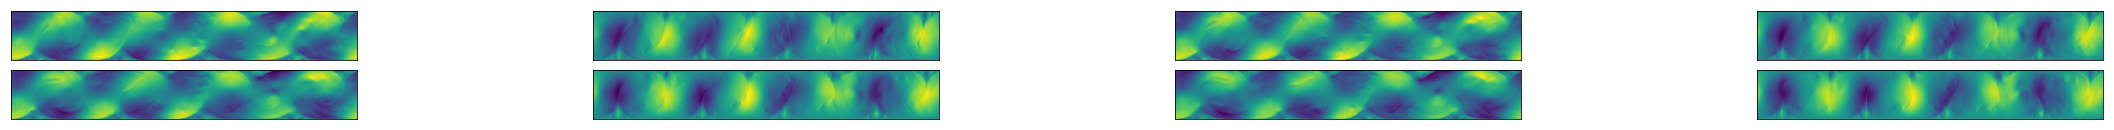

In [7]:

# ux_data_plot = ds['u_x'][start_time].values
# uy_data_plot = ds['u_y'][start_time].values

# fig=plt.figure(figsize=(10, 10))
# fig.add_subplot(2, 1, 1)
# plt.imshow(ux_data_plot)
# plt.xticks([])
# plt.yticks([])
# fig.add_subplot(2, 1, 2)
# plt.imshow(uy_data_plot)
# plt.xticks([])
# plt.yticks([])

fig=plt.figure(figsize=(40, 2))
idx=1
for tim in range(15000,15004):
    ux_data_plot = ds['u_x'][tim].values
    uy_data_plot = ds['u_y'][tim].values
    
    fig.add_subplot(2, 4, idx)
    idx += 1
    plt.imshow(ux_data_plot)
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(2, 4,  idx)
    idx += 1
    plt.imshow(uy_data_plot)
    plt.xticks([])
    plt.yticks([])

plt.savefig("./sample of velocities.png", dpi=400)
# ds = xr.open_dataset(file_path, decode_times=False	)



In [13]:
"""
This block plots the differnet velocity field vectors for considered time range and how normalizing them affects them

"""




st_time = 10000
end_time = 15000
image_size = 256

# ux_data_for_tke = ds['u_x'][st_time : end_time].values
# uy_data_for_tke = ds['u_y'][st_time : end_time].values


dataset_location = "/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/"


load_path = os.path.join(dataset_location + "tke_average_energies.npy")
my_dict_back = np.load(load_path, allow_pickle=True)



ux_average_over_time = my_dict_back.item()["{}_ux".format(image_size)]
uy_average_over_time = my_dict_back.item()["{}_uy".format(image_size)]

# print(ux_data_for_tke.shape)
# print(uy_data_for_tke.shape)

res_list = [8, 16, 32, 64, 128, 256]
tt = time.time()
Data = {}
for res in res_list:
    ux_reshape = ux_data_for_tke.reshape(-1, res, res)    
    uy_reshape = uy_data_for_tke.reshape(-1, res, res)
    
    print(ux_reshape.shape)
    ux_data_mean_tke = np.mean(ux_reshape, axis = 0)
    uy_data_mean_tke = np.mean(uy_reshape, axis = 0)
    print(ux_data_mean_tke.shape)
    print("Time taken to complete iteration", time.time() - tt)
    Data["{}_ux".format(res)] = ux_data_mean_tke
    Data["{}_uy".format(res)] = uy_data_mean_tke
    
    
    
     
# save_path = os.path.join(dir_path , "rbc_{}/".format(number_of_timesteps))

if not os.path.exists(save_path):
    os.makedirs(save_path)

np.save( str(save_path) + "tke_average_energies.npy", Data)
    
print("Time taken to complete iteration", time.time() - tt)

    

(5000, 256, 1792)
(5000, 256, 1792)
(35840000, 8, 8)
(8, 8)
Time taken to complete iteration 15.250751495361328
(8960000, 16, 16)
(16, 16)
Time taken to complete iteration 21.891648530960083
(2240000, 32, 32)
(32, 32)
Time taken to complete iteration 24.377888679504395
(560000, 64, 64)
(64, 64)
Time taken to complete iteration 27.230008602142334
(140000, 128, 128)
(128, 128)
Time taken to complete iteration 30.25279402732849
(35000, 256, 256)
(256, 256)
Time taken to complete iteration 33.50665736198425
Time taken to complete iteration 33.51662564277649


In [15]:
# <xarray.Dataset>
# Dimensions:     (time: 23630, x: 1792, y: 256)
# Coordinates:
#   * x           (x) float32 0.001953125 0.005859375 ... 6.9941406 6.998047
#   * y           (y) float32 0.001953125 0.005859375 ... 0.9941406 0.9980469
#   * time        (time) float32 0.0 1.6919324e-05 ... 0.3999698 0.3999867
# Data variables:
#     press_diff  (time, y, x) float32 ...
#     temp_diff   (time, y, x) float32 ...
#     u_x         (time, y, x) float32 ...
#     u_y         (time, y, x) float32 ...
#     max_u_y     (time) float64 ...
#     tke         (time) float64 ...
# Attributes:
#     Conventions:                   CF-1.6
#     Ra:                            250000000.0
#     Pr:                            0.71
#     maxMach:                       0.1
#     char. length:                  channel height $L$
#     char. time:                    diffusive time-scale $rac{L^2}{kappa}$
# ho_0kappa^2}{L^2}$-difference:     $rac{
#     char. velocity:                $rac{kappa}{L}$
#     char. temperature-difference:  temperature-diff / horiz. walls $\theta_b-...



# ds dims : 
# Frozen(SortedKeysDict({'x': 1792, 'y': 256, 'time': 23630}))



# ds data_vars: 
# Data variables:
#     press_diff  (time, y, x) float32 ...
#     temp_diff   (time, y, x) float32 ...
#     u_x         (time, y, x) float32 ...
#     u_y         (time, y, x) float32 ...
#     max_u_y     (time) float64 ...
#     tke         (time) float64 ...



# ds coords : 
# Coordinates:
#   * x        (x) float32 0.001953125 0.005859375 ... 6.9941406 6.998047
#   * y        (y) float32 0.001953125 0.005859375 ... 0.9941406 0.9980469
#   * time     (time) float32 0.0 1.6919324e-05 ... 0.3999698 0.3999867



# ds attrs : 
# OrderedDict([('Conventions', 'CF-1.6'), ('Ra', 250000000.0), ('Pr', 0.71), ('maxMach', 0.1), ('char. length', 'channel height $L$'), ('char. time', 'diffusive time-scale $\x0crac{L^2}{kappa}$'), ('char. pressure-difference', '$\x0crac{\rho_0kappa^2}{L^2}$'), ('char. velocity', '$\x0crac{kappa}{L}$'), ('char. temperature-difference', 'temperature-diff / horiz. walls $\theta_b-\theta_t$')])



AttributeError: NetCDF: Attribute not found

In [ ]:

number_of_timesteps = 500
end_time = 23000
image_size = 128


for start_time in range (0, end_time, number_of_timesteps):
    ux_data = ds['u_x'][start_time : start_time+ number_of_timesteps].values
    uy_data = ds['u_y'][start_time : start_time+ number_of_timesteps].values
    tmp_diff_data = ds['temp_diff'][start_time : start_time+ number_of_timesteps].values
    press_diff_data = ds['press_diff'][start_time : start_time+ number_of_timesteps].values

    rb_data = []
    u_x = ux_data.reshape(number_of_timesteps, -1, image_size,image_size)
    u_y = uy_data.reshape(number_of_timesteps, -1, image_size,image_size)
    tmp_diff = tmp_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
    press_diff = press_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
    print(press_diff.shape)
    print(tmp_diff.shape)
    print(u_x.shape)
    print(u_y.shape)
    
    channels = np.array([u_x, u_y, tmp_diff, press_diff])
    print(channels.shape)
    Data = np.float32(channels)
    Data = Data.transpose(1,2,0,3,4)
    print(Data.shape)
    np.save("/global/cscratch1/sd/rgupta2/backup/netcdf/npy_files/tf_data_for_timesteps_{}__{}.npy".format(start_time, start_time+number_of_timesteps), Data)

    
    
    

#         u_x = np.array([ux_data[i].filled()[j*128:(j+1)*128,k*128:(k+1)*128] for j in range(4) for k in range(7)])
#         u_y = np.array([uy_data[i].filled()[j*128:(j+1)*128,k*128:(k+1)*128] for j in range(4) for k in range(7)])
#         tmp_diff = np.array([tmp_diff_data[i].filled()[j*128:(j+1)*128,k*128:(k+1)*128] for j in range(4) for k in range(7)])
#         press_diff = np.array([press_diff_data[i].filled()[j*128:(j+1)*128,k*128:(k+1)*128] for j in range(4) for k in range(7)])
#         print("sizes of different channels: ")
#         print(.shape)
#         print(tmp_diff.shape)
#         print(press_diff.shape)
#         rb_data =  time_steps * channels * num_subregions  * w * h

   

(500, 28, 128, 128)
(500, 28, 128, 128)
(500, 28, 128, 128)
(500, 28, 128, 128)
(4, 500, 28, 128, 128)
(4, 28, 500, 128, 128)


In [ ]:

print("ds info : ")
print(ds)
print("\n\n")



print("ds dims : ")
print(ds.dims)
print("\n\n")


print("ds data_vars: ")
print(ds.data_vars)
print("\n\n")


print("ds coords : ")
print(ds.coords)
print("\n\n")


print("ds attrs : ")
print(ds.attrs)
print("\n\n")


In [47]:
print(ds['temp_diff'][:30].values.shape)

(30, 256, 1792)


In [9]:
import sys
!{sys.executable} -m pip install cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

/usr/bin/sh: module: line 1: syntax error: unexpected end of file
/usr/bin/sh: error importing function definition for `module'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'


In [1]:
from glob import glob
import re, os
dataset_location = "/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/"


filelist = [] 
tmp_list = sorted(glob("{}/*.npy".format(dataset_location)))[:-1]
print(tmp_list)
# res = [f for f in tmp_list if "^\d" ]
# print(res)

for file in tmp_list:
    if re.match("^\d", file):
        filelist.append(file)

s = '19888_300'
print(re.findall('\d+', s))

['/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/10000.npy', '/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/10500.npy', '/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/11000.npy', '/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/11500.npy', '/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/12000.npy', '/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/12500.npy', '/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/13000.npy', '/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/13500.npy', '/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/14000.npy', '/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/rbc_500/14500.npy']
['19888', '300']


In [25]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [21]:
tmp_press = ds['press_diff'][:, :10 , :100]

In [20]:
tmp_press

<xarray.DataArray 'press_diff' (time: 23630, y: 10, x: 100)>
[23630000 values with dtype=float32]
Coordinates:
  * x        (x) float32 0.001953125 0.005859375 ... 0.38476562 0.38867188
  * y        (y) float32 0.001953125 0.005859375 ... 0.033203125 0.037109375
  * time     (time) float32 0.0 1.6919324e-05 ... 0.3999698 0.3999867
Attributes:
    units:      1
    long_name:  char. pressure-difference

In [22]:
tmp_press.to_dataframe()

press_diff
time     y        x                   
0.000000 0.001953 0.001953         0.0
                  0.005859         0.0
                  0.009766         0.0
                  0.013672         0.0
                  0.017578         0.0
...                                ...
0.399987 0.037109 0.373047  -8106399.0
                  0.376953  -8413443.0
                  0.380859  -8724603.0
                  0.384766  -9039488.0
                  0.388672  -9357712.0

[23630000 rows x 1 columns]

In [27]:
dataset = Dataset(file_path)

(400, 256, 1792)


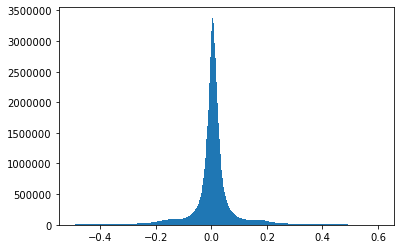

In [50]:
print(tmp_diff.shape)
from pims import ImageSequence


plt.hist(tmp_diff.flatten(), bins=1000)
plt.show()

In [54]:
tmp_diff_max = tmp_diff.max()
tmp_diff_min = tmp_diff.min()
print(tmp_diff_max)
print(tmp_diff_min)


0.60145724
-0.49437845


In [ ]:

for i in range(0,5600, 400):
    
    u_x = dataset['u_x'][i:i+400]
    u_y = dataset['u_y'][i:i+400]
    tmp_diff = dataset['temp_diff'][i:400]
    press_diff = dataset['press_diff'][i:400]
    plt.hist(tmp_diff.flatten(), bins=80)
    plt.show()

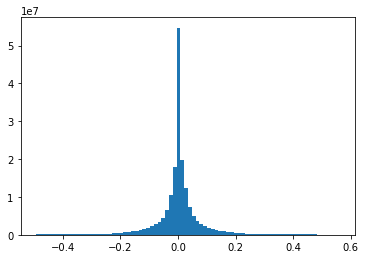

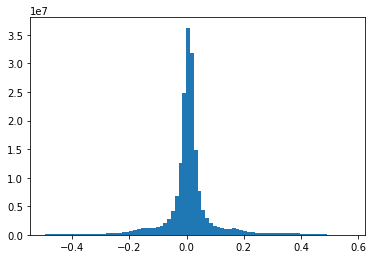

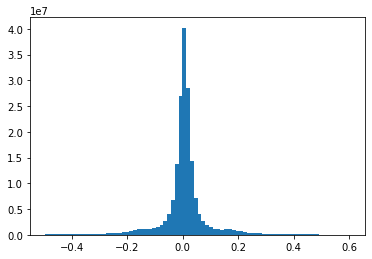

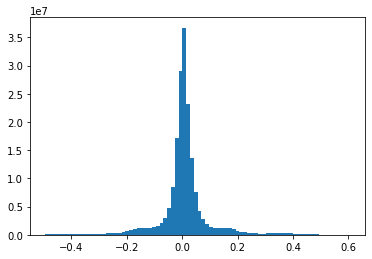

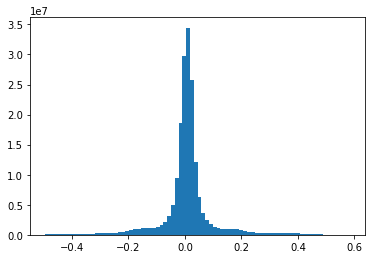

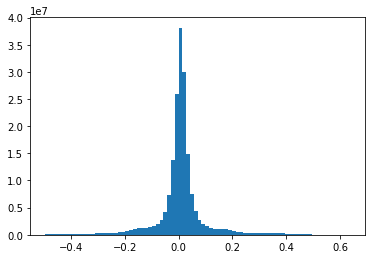

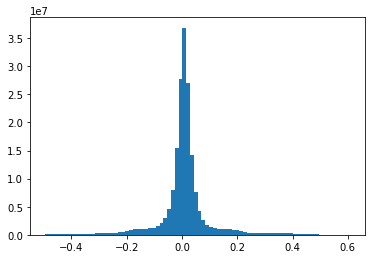

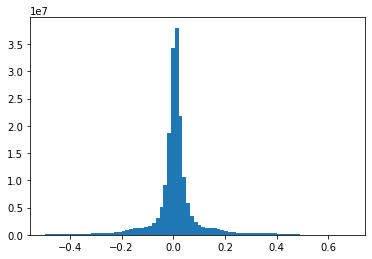

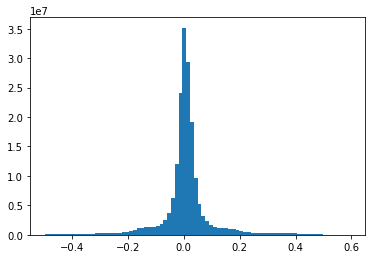

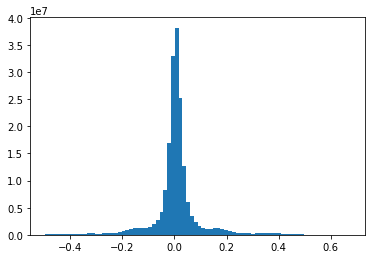

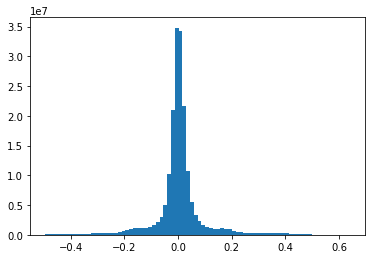

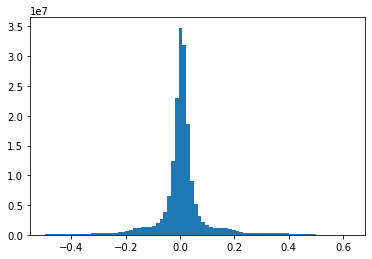

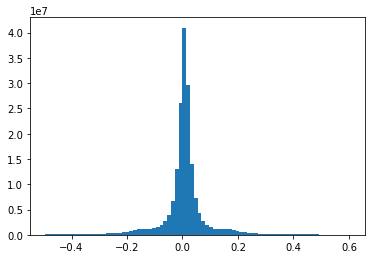

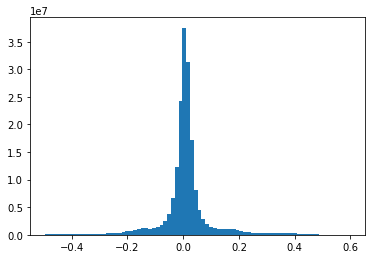

In [57]:

for i in range(0,5600, 400):
    
    u_x = dataset['u_x'][i: i+400]
    u_y = dataset['u_y'][i: i+400]
    tmp_diff = dataset['temp_diff'][i: i+400]
    press_diff = dataset['press_diff'][i: i+400]
    plt.hist(tmp_diff.flatten(), bins=80)
    plt.show()

In [ ]:
x = np.array(
    [
        [i].filled()
        [j*64:(j+1)*64,k*64:(k+1)*64] 
        for j in range(4) for k in range(28)
    ]
    )
y = np.array([raw_uy[i].filled()[j*64:(j+1)*64,k*64:(k+1)*64] for j in range(4) for k in range(28)])
temp = np.array([x,y])

In [36]:
subsection2 = ImageSequnce[]


NameError: name 'Images' is not defined